### Supervised, Semi-Supervised, and Unsupervised Learning on the Breast Cancer Wisconsin (Diagnostic) Data Set



In this project , I have studied various methods for classification of data on the Breast Cancer Wisconsin (Diagnostic) Data Set .  <br>

The methods are listed below: <br>
1) <b> Supervised Learning </b> - Used an L-1 penalized SVM  <br>
2) <b>Semi-Supervised Learning/ Self-training </b>: Randomly selected 50% of the positive class along with 50% of the negative classalong with 50% of the negative class. <br>
--Used an L-1 penalized SVM for classification <br>
3) <b> Unsupervised Learning </b>: Using k-means algorithm <br>
4) <b>Unsupervised Learning </b>: Using <b>Spectral Clustering </b> algorithm   <br>

Diagnostic Wisconsin Breast Cancer Database

The data is downloaded from : 
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information: <br>

1) ID number <br>
2) Diagnosis (M = malignant, B = benign)<br>
Ten real-valued features are used for each cell nucleus.<br>


In [68]:
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from sklearn import metrics
import random 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV,train_test_split


In [69]:
dataset = pd.read_csv("breast_cancer_data.csv",header=None)
cols=["ID","Diagnosis","Attr_1","Attr_2","Attr_3","Attr_4","Attr_5","Attr_6","Attr_7","Attr_8","Attr_9","Attr_10","Attr_11","Attr_12","Attr_13","Attr_14","Attr_15","Attr_16","Attr_17","Attr_18","Attr_19","Attr_20","Attr_21","Attr_22","Attr_23","Attr_24","Attr_25","Attr_26","Attr_27","Attr_28","Attr_29","Attr_30"]
dataset.columns = cols
dataset=dataset.drop("ID",axis=1)
dataset.head()

,Diagnosis,Attr_1,Attr_2,Attr_3,Attr_4,Attr_5,Attr_6,Attr_7,Attr_8,Attr_9,...,Attr_21,Attr_22,Attr_23,Attr_24,Attr_25,Attr_26,Attr_27,Attr_28,Attr_29,Attr_30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Normalizing the Data

In [70]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
X = pd.DataFrame()
X = dataset.drop(["Diagnosis"],axis=1)

# Taking Benign =1 Malignant=0

Y=np.where(dataset["Diagnosis"]=="M",0,1)
Y=pd.DataFrame(Y)
Y.columns=["Diagnosis"]
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
X=pd.DataFrame(X)
normalized_data=pd.concat([X,Y],axis=1)
normalized_data.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Diagnosis
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0


In [71]:
# Taking Positive class=Benign and Negative class=Malignant

X_positive = normalized_data[normalized_data["Diagnosis"]==1]
X_negative = normalized_data[normalized_data["Diagnosis"]==0]

### Using Monte-Carlo Simulation- 
#### that is repeating the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and using randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). 
#### We then compare the average scores (accuracy, precision, recall, F-score, and AUC) from each algorithm.

### Supervised Learning: 
#### Training an L1-penalized SVM to classify the data. Used 5 fold cross validation to choose the penalty parameter. Used normalized data. 

### Supervised Learning

In [5]:
final_supervised_train_results = {p:None for p in ['accuracy','precision','recall','fscore','auc']}
final_supervised_test_results = {p:None for p in ['accuracy','precision','recall','fscore','auc']}


sv_train_results={p:[] for p in ['accuracy','precision','recall','fscore','auc']}

sv_test_results={p:[] for p in ['accuracy','precision','recall','fscore','auc']}

#-----------------------------Monte- Carlo Simulation----------------------------------------
for i in range(1,31):
    
    # Randomly selecting Train and Test Data (with 20% positive and 20% negative samples)
    
    X_test = pd.concat([X_positive.sample(frac=0.2),X_negative.sample(frac=0.2)])
    X_train=normalized_data.drop(index=X_test.index.tolist())

    y_train=X_train["Diagnosis"]
    y_test=X_test["Diagnosis"]
    
    X_test = X_test.drop(["Diagnosis"],axis=1)
    X_train = X_train.drop(["Diagnosis"],axis=1)
    
    best_penalty=[]
    
    # Training a L-1 Penalized SVM using 5-Fold cross validation
    
    params = {'C':[0.1,1,10,100,1000]}
    l_svc = LinearSVC(penalty='l1', dual = False, max_iter=1000000)
    supervised_classifier = GridSearchCV(l_svc, params, cv=5)
    supervised_classifier.fit(X_train,y_train)
    
    # Getting the Best penalty
    best_penalty.append(supervised_classifier.best_params_['C'])
    
    # Getting Predicted results for Train and Test Sets
    
    supervised_train_results = pd.DataFrame()
    supervised_train_results["True_y"] = y_train
    supervised_train_results["Pred_y"] = supervised_classifier.predict(X_train)

    supervised_test_results = pd.DataFrame()
    supervised_test_results["True_y"] = y_test
    supervised_test_results["Pred_y"] = supervised_classifier.predict(X_test)

    # Accuracy, Precision, Recall, F-score, and AUC of TRAIN SET and TEST SET

    # Accuracy for Train and Test
    sv_train_results['accuracy'].append(supervised_classifier.score(X_train,y_train))
    sv_test_results['accuracy'].append(supervised_classifier.score(X_test,y_test))

    # Precision for Train and Test
    sv_train_results['precision'].append(precision_score(supervised_train_results["True_y"],supervised_train_results["Pred_y"]))
    sv_test_results['precision'].append(precision_score(supervised_test_results["True_y"],supervised_test_results["Pred_y"]))

    # Recall for Train and Test
    sv_train_results['recall'].append(recall_score(supervised_train_results["True_y"],supervised_train_results["Pred_y"]))
    sv_test_results['recall'].append(recall_score(supervised_test_results["True_y"],supervised_test_results["Pred_y"]))

    # F-score for Train and Test
    sv_train_results['fscore'].append(f1_score(supervised_train_results["True_y"],supervised_train_results["Pred_y"]))
    sv_test_results['fscore'].append(f1_score(supervised_test_results["True_y"],supervised_test_results["Pred_y"]))

    # AUC for Train and Test
    fpr, tpr, _ = roc_curve(supervised_train_results["True_y"],supervised_train_results["Pred_y"])
    area_uc = auc(fpr, tpr)
    sv_train_results['auc'].append(auc(fpr, tpr))

    fpr, tpr, _ = roc_curve(supervised_test_results["True_y"],supervised_test_results["Pred_y"])
    area_uc = auc(fpr, tpr)
    sv_test_results['auc'].append(auc(fpr, tpr))

    # Average scores (accuracy, precision, recall, F-score, and AUC) for Train set
    final_supervised_train_results['accuracy']=np.mean(sv_train_results['accuracy'])
    final_supervised_train_results['precision']=np.mean(sv_train_results['precision'])
    final_supervised_train_results['recall']=np.mean(sv_train_results['recall'])
    final_supervised_train_results['fscore']=np.mean(sv_train_results['fscore'])
    final_supervised_train_results['auc']=np.mean(sv_train_results['auc'])
    
     # Average scores (accuracy, precision, recall, F-score, and AUC) for Test set
    final_supervised_test_results['accuracy']=np.mean(sv_test_results['accuracy'])
    final_supervised_test_results['precision']=np.mean(sv_test_results['precision'])
    final_supervised_test_results['recall']=np.mean(sv_test_results['recall'])
    final_supervised_test_results['fscore']=np.mean(sv_test_results['fscore'])
    final_supervised_test_results['auc']=np.mean(sv_test_results['auc'])
    
print("\n Average Score over 30 Runs for Train set:\n")
print(final_supervised_train_results)

print("\n Average Score over 30 Runs for Test set:\n")
print(final_supervised_test_results)


 Average Score over 30 Runs for Train set:

{'accuracy': 0.9853801169590642, 'precision': 0.9822935142595202, 'recall': 0.9946386946386947, 'fscore': 0.988419596220959, 'auc': 0.9822213081036609}

 Average Score over 30 Runs for Test set:

{'accuracy': 0.9651917404129793, 'precision': 0.9667487397162012, 'recall': 0.9788732394366197, 'fscore': 0.9725621851854221, 'auc': 0.960468365750056}


### Confusion Matrix and ROC for Train Set


Confusion Matrix for train data:
 [[166   4]
 [  3 283]]

Area under curve for train data: 0.9829905388728919


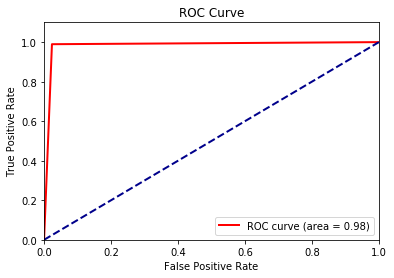

In [6]:

cm = metrics.confusion_matrix(supervised_train_results["True_y"],supervised_train_results["Pred_y"])
print("\nConfusion Matrix for train data:\n",cm)
fpr, tpr, _ = roc_curve(supervised_train_results["True_y"],supervised_train_results["Pred_y"])
area_uc = auc(fpr, tpr)
print("\nArea under curve for train data:",area_uc)
plt.figure()
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve (area = %0.2f)' % area_uc)
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend(loc="lower right")
plt.show()

### Confusion Matrix and ROC for Test Set


Confusion Matrix for Test data:
 [[39  3]
 [ 2 69]]

Area under curve for test data: 0.9502012072434608


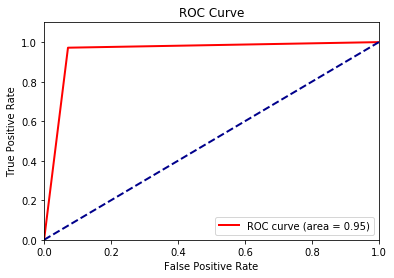

In [7]:

cm = metrics.confusion_matrix(supervised_test_results["True_y"],supervised_test_results["Pred_y"])
print("\nConfusion Matrix for Test data:\n",cm)
fpr, tpr, _ = roc_curve(supervised_test_results["True_y"],supervised_test_results["Pred_y"])
area_uc = auc(fpr, tpr)
print("\nArea under curve for test data:",area_uc)

plt.figure()
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve (area = %0.2f)' % area_uc)
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend(loc="lower right")
plt.show()

### Semi-Supervised Learning/ Self-training: 
#### Randomly selecting 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data.
####  Training an L1-penalized SVM to classify the labeled data Used normalized data. Choosing the penalty parameter using 5 fold cross validation.
#### Next, we find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data and the average accuracy, precision, recall, F-score, and AUC, for both training and test sets over your M runs

In [72]:
best_penalty=[]
def fit_l1_svm(train_X,train_y):
    params = {'C':[0.1,1,10,100,1000]}
    l_svc = LinearSVC(penalty='l1', dual = False, max_iter=200000)
    supervised_classifier = GridSearchCV(l_svc, params, cv=5,iid=1)
    supervised_classifier.fit(train_X,train_y)
    
    # Getting the Best penalty
    best_penalty.append(supervised_classifier.best_params_['C'])
    
    return supervised_classifier 

In [73]:
X_test = pd.concat([X_positive.sample(frac=0.2),X_negative.sample(frac=0.2)])
X_train=normalized_data.drop(index=X_test.index.tolist())

y_test=X_test["Diagnosis"]
y_train=X_train["Diagnosis"]

X_test = X_test.drop(["Diagnosis"],axis=1)
X_train = X_train.drop(["Diagnosis"],axis=1)
    
X_label, X_unlabel, y_label, y_unlabel = train_test_split(X_train, y_train, test_size=0.50, stratify=y_train)

X_label=X_label.reset_index(drop=True)
y_label=y_label.reset_index(drop=True)
X_unlabel=X_unlabel.reset_index(drop=True)
y_unlabel=pd.DataFrame(y_unlabel)
y_unlabel=y_unlabel.reset_index(drop=True)

# Training L1-penalized SVM to classify the labeled data
trained_svm=fit_l1_svm(X_label,y_label)
print("Best Weight of SVM penalty = ", trained_svm.best_params_['C'])

Best Weight of SVM penalty =  1


In [75]:
final_semi_supervised_train_results = {p:None for p in ['accuracy','precision','recall','fscore','auc']}
final_semi_supervised_test_results = {p:None for p in ['accuracy','precision','recall','fscore','auc']}


semi_train_results={p:[] for p in ['accuracy','precision','recall','fscore','auc']}

semi_test_results={p:[] for p in ['accuracy','precision','recall','fscore','auc']}


#-----------------------------Monte- Carlo Simulation----------------------------------------

for i in range(1,31):
    
    # Randomly selecting Labelled Data (with 50% positive and 50% negative samples) in train set
    
    X_test = pd.concat([X_positive.sample(frac=0.2),X_negative.sample(frac=0.2)])
    X_train=normalized_data.drop(index=X_test.index.tolist())

    y_test=X_test["Diagnosis"]
    y_train=X_train["Diagnosis"]

    X_test = X_test.drop(["Diagnosis"],axis=1)
    X_train = X_train.drop(["Diagnosis"],axis=1)

    X_label, X_unlabel, y_label, y_unlabel = train_test_split(X_train, y_train, test_size=0.50, stratify=y_train)

    X_label=X_label.reset_index(drop=True)
    y_label=y_label.reset_index(drop=True)
    X_unlabel=X_unlabel.reset_index(drop=True)
    y_unlabel=pd.DataFrame(y_unlabel)
    y_unlabel=y_unlabel.reset_index(drop=True)

    # Training L1-penalized SVM to classify the labeled data
    trained_svm=fit_l1_svm(X_label,y_label)
    
    #print("Best Weight of SVM penalty = ", trained_svm.best_params_['C'])
#---------------------------------------------------------------------------   
    # Problem B: Finding the Farthest data point to the decision boundary
    
    X_label_new=pd.DataFrame()
    X_label_new=pd.concat([X_label,X_label_new],axis=0,ignore_index=True)

    y_label_new=pd.DataFrame()
    y_label=y_label.rename(columns = [0])
    y_label=pd.DataFrame(y_label)

    y_label_new=pd.concat([y_label,y_label_new],axis=0,ignore_index=True)

#-------------------------------------------------------------------------   
    while(len(X_unlabel)>0):
    
        # Finding the distance of data points from the svm hyperplane
        a=trained_svm.decision_function(X_unlabel)

        farthest_point1=np.array(X_unlabel.iloc[np.argmax(np.absolute(a))])
        #print(np.argmax(np.absolute(a)))
        farthest_point1=farthest_point1.reshape(1,-1)

        #Letting the SVM label the datapoint
        predicted_label=trained_svm.predict(farthest_point1)

        farthest_point1=pd.DataFrame(farthest_point1)

        #Adding the point to the labelled dataset
        X_label_new=pd.concat([X_label_new,farthest_point1],axis=0,ignore_index=True)

        farthest_point1_y=np.array(predicted_label)
        farthest_point1_y=farthest_point1_y.reshape(1,-1)
        farthest_point1_y=pd.DataFrame(farthest_point1_y)
        y_label_new=pd.concat([y_label_new,farthest_point1_y],axis=0,ignore_index=True)

        # Retraining the SVM again with the new dat point added
        trained_svm=fit_l1_svm(X_label_new,np.ravel(y_label_new,order='C'))

        # Removing the datapoint from the unlabelled dataset
        X_unlabel=X_unlabel.drop(index=np.argmax(np.absolute(a)))
        X_unlabel=X_unlabel.reset_index(drop=True)
        y_unlabel=y_unlabel=y_unlabel.drop(index=np.argmax(np.absolute(a)))
        y_unlabel=y_unlabel.reset_index(drop=True)
        #print(X_label.shape,y_label.shape,y_unlabel.shape,farthest_point1.shape,X_label_new.shape,y_label_new.shape)
    
#-----------------------------------------------------------------------------------

    # Testing the final SVM on Test data
    
    semi_supervised_test_results = pd.DataFrame()
    semi_supervised_test_results["True_y"] = y_test
    semi_supervised_test_results["Pred_y"] = trained_svm.predict(X_test)

    
    # Getting Predicted results for Train Set
    
    semi_supervised_train_results = pd.DataFrame()
    semi_supervised_train_results["True_y"] = y_train
    semi_supervised_train_results["Pred_y"] = trained_svm.predict(X_train)

   
    # Accuracy, Precision, Recall, F-score, and AUC of TRAIN SET and TEST SET

    # Accuracy for Train and Test
    semi_train_results['accuracy'].append(trained_svm.score(X_train,y_train))
    semi_test_results['accuracy'].append(trained_svm.score(X_test,y_test))

    # Precision for Train and Test
    semi_train_results['precision'].append(precision_score(semi_supervised_train_results["True_y"],semi_supervised_train_results["Pred_y"]))
    semi_test_results['precision'].append(precision_score(semi_supervised_test_results["True_y"],semi_supervised_test_results["Pred_y"]))

    # Recall for Train and Test
    semi_train_results['recall'].append(recall_score(semi_supervised_train_results["True_y"],semi_supervised_train_results["Pred_y"]))
    semi_test_results['recall'].append(recall_score(semi_supervised_test_results["True_y"],semi_supervised_test_results["Pred_y"]))

    # F-score for Train and Test
    semi_train_results['fscore'].append(f1_score(semi_supervised_train_results["True_y"],semi_supervised_train_results["Pred_y"]))
    semi_test_results['fscore'].append(f1_score(semi_supervised_test_results["True_y"],semi_supervised_test_results["Pred_y"]))

    # AUC for Train and Test
    fpr, tpr, _ = roc_curve(semi_supervised_train_results["True_y"],semi_supervised_train_results["Pred_y"])
    area_uc = auc(fpr, tpr)
    semi_train_results['auc'].append(auc(fpr, tpr))

    fpr, tpr, _ = roc_curve(semi_supervised_test_results["True_y"],semi_supervised_test_results["Pred_y"])
    area_uc = auc(fpr, tpr)
    semi_test_results['auc'].append(auc(fpr, tpr))

    # Average scores (accuracy, precision, recall, F-score, and AUC) for Train set
    final_semi_supervised_train_results['accuracy']=np.mean(semi_train_results['accuracy'])
    final_semi_supervised_train_results['precision']=np.mean(semi_train_results['precision'])
    final_semi_supervised_train_results['recall']=np.mean(semi_train_results['recall'])
    final_semi_supervised_train_results['fscore']=np.mean(semi_train_results['fscore'])
    final_semi_supervised_train_results['auc']=np.mean(semi_train_results['auc'])
    
     # Average scores (accuracy, precision, recall, F-score, and AUC) for Test set
    final_semi_supervised_test_results['accuracy']=np.mean(semi_test_results['accuracy'])
    final_semi_supervised_test_results['precision']=np.mean(semi_test_results['precision'])
    final_semi_supervised_test_results['recall']=np.mean(semi_test_results['recall'])
    final_semi_supervised_test_results['fscore']=np.mean(semi_test_results['fscore'])
    final_semi_supervised_test_results['auc']=np.mean(semi_test_results['auc'])
    
print("\n Average Score over 30 Runs for Train set:\n")
print(final_semi_supervised_train_results)

print("\n Average Score over 30 Runs for Test set:\n")
print(final_semi_supervised_test_results)


 Average Score over 30 Runs for Train set:

{'accuracy': 0.9714912280701754, 'precision': 0.9595959595959596, 'recall': 0.9965034965034965, 'fscore': 0.9777015437392795, 'auc': 0.9629576306046895}

 Average Score over 30 Runs for Test set:

{'accuracy': 0.9469026548672567, 'precision': 0.922077922077922, 'recall': 1.0, 'fscore': 0.9594594594594594, 'auc': 0.9285714285714286}


### Confusion Matrix and ROC for Train Set


Confusion Matrix for train data:
 [[165   5]
 [  2 284]]

Area under curve for train data: 0.9817976141505552


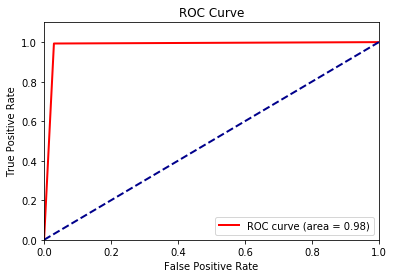

In [11]:
# Confusion Matrix

cm = metrics.confusion_matrix(semi_supervised_train_results["True_y"],semi_supervised_train_results["Pred_y"])
print("\nConfusion Matrix for train data:\n",cm)
fpr, tpr, _ = roc_curve(semi_supervised_train_results["True_y"],semi_supervised_train_results["Pred_y"])
area_uc = auc(fpr, tpr)
print("\nArea under curve for train data:",area_uc)
plt.figure()
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve (area = %0.2f)' % area_uc)
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend(loc="lower right")
plt.show()

### Confusion Matrix and ROC for Test Set


Confusion Matrix for Test data:
 [[38  4]
 [ 3 68]]

Area under curve for test data: 0.9312541918175722


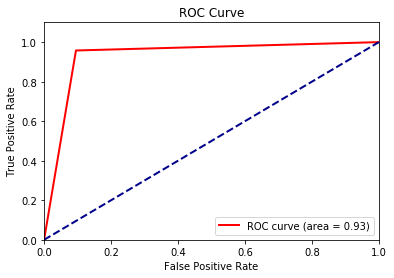

In [15]:

cm = metrics.confusion_matrix(semi_supervised_test_results["True_y"],semi_supervised_test_results["Pred_y"])
print("\nConfusion Matrix for Test data:\n",cm)
fpr, tpr, _ = roc_curve(semi_supervised_test_results["True_y"],semi_supervised_test_results["Pred_y"])
area_uc = auc(fpr, tpr)
print("\nArea under curve for test data:",area_uc)

plt.figure()
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve (area = %0.2f)' % area_uc)
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend(loc="lower right")
plt.show()

### Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.



#### To reduce the chances of the algorithm getting trapped in the local minimum, We can do Repeated clustering and randomizing cluster assignments, however we cannot entirely avoid local minima in K_means as any clustering is heuristic and explorative.

In [17]:
dataset = pd.read_csv("breast_cancer_data.csv",header=None)
cols=["ID","Diagnosis","Attr_1","Attr_2","Attr_3","Attr_4","Attr_5","Attr_6","Attr_7","Attr_8","Attr_9","Attr_10","Attr_11","Attr_12","Attr_13","Attr_14","Attr_15","Attr_16","Attr_17","Attr_18","Attr_19","Attr_20","Attr_21","Attr_22","Attr_23","Attr_24","Attr_25","Attr_26","Attr_27","Attr_28","Attr_29","Attr_30"]
dataset.columns = cols
dataset=dataset.drop("ID",axis=1)
#dataset.head()

In [18]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
X = pd.DataFrame()
X = dataset.drop(["Diagnosis"],axis=1)

# Taking Benign =1 Malignant=0

Y=np.where(dataset["Diagnosis"]=="M",0,1)
Y=pd.DataFrame(Y)
Y.columns=["Diagnosis"]
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
X=pd.DataFrame(X)
normalized_data=pd.concat([X,Y],axis=1)
#normalized_data.head()

In [19]:
# Taking Positive class=Benign and Negative class=Malignant

X_positive = normalized_data[normalized_data["Diagnosis"]==1]
X_negative = normalized_data[normalized_data["Diagnosis"]==0]

In [20]:
X_test = pd.concat([X_positive.sample(frac=0.2),X_negative.sample(frac=0.2)])
X_train=normalized_data.drop(index=X_test.index.tolist())
y_test=X_test["Diagnosis"]
y_train=X_train["Diagnosis"]

X_test = X_test.drop(["Diagnosis"],axis=1)
X_train = X_train.drop(["Diagnosis"],axis=1)

#### We then compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data.

#### We classify test data based on their proximity to the centers of the clusters.


In [51]:
final_unsupervised_train_results = {p:None for p in ['accuracy','precision','recall','fscore','auc']}
final_unsupervised_test_results = {p:None for p in ['accuracy','precision','recall','fscore','auc']}


unsupr_train_results={p:[] for p in ['accuracy','precision','recall','fscore','auc']}

unsupr_test_results={p:[] for p in ['accuracy','precision','recall','fscore','auc']}

for i in range(1,31):
    
    # Randomly selecting Labelled Data (with 50% positive and 50% negative samples) in train set
    
    X_test = pd.concat([X_positive.sample(frac=0.2),X_negative.sample(frac=0.2)])
    X_train=normalized_data.drop(index=X_test.index.tolist())

    y_test=X_test["Diagnosis"]
    y_train=X_train["Diagnosis"]

    X_test = X_test.drop(["Diagnosis"],axis=1)
    X_train = X_train.drop(["Diagnosis"],axis=1)

    X_label, X_unlabel, y_label, y_unlabel = train_test_split(X_train, y_train, test_size=0.50, stratify=y_train)

    X_train=X_train.reset_index(drop=True)
    y_train=y_train.reset_index(drop=True)
    X_test=X_test.reset_index(drop=True)
    y_test=y_test.reset_index(drop=True)
    
    # Computing the centers of two clusters 
    k_means = KMeans(n_clusters=2,init='k-means++',random_state=random.randint(20,200),n_init=20).fit(X_train)
    clus_dist= k_means.transform(X_train)
    #print(k_means.cluster_centers_)

    # Finding the closest 30 data points to each center
    nn = NearestNeighbors(n_neighbors=30,algorithm='brute').fit(X_train)
    distances, indices = nn.kneighbors(k_means.cluster_centers_)

    # Reading the true lables of the 30 datapoints
    clus_0=y_train.loc[indices[0]]
    clus_1=y_train.loc[indices[1]]

    # Taking a majority poll with these 30 points which becomes the label
    # predicted by k-means for the members of each cluster. 
    maj_poll_clus_0=clus_0.value_counts()
    maj_poll_clus_1=clus_1.value_counts()

    # Finding the labels provided by K_means
    pred_labels= k_means.labels_
    pred_labels= pd.DataFrame(pred_labels)

    pred_labels_0=pred_labels[pred_labels[0]==0]
    pred_labels_1=pred_labels[pred_labels[0]==1]

    # Compare the labels provided by K-means with the true labels of the training data

    max_index_0=np.argmax(maj_poll_clus_0)
    max_index_1=np.argmax(maj_poll_clus_1)
    pred_labels_0['class']=max_index_0
    pred_labels_1['class']=max_index_1
    final_pred_y=pd.concat([pred_labels_0['class'],pred_labels_1['class']],axis=0)
    final_pred_y=final_pred_y.sort_index()

    # Testing the final Model on Test data
    
    unsupervised_test_results = pd.DataFrame()
    unsupervised_test_results["True_y"] = y_test
    unsupervised_test_results["Pred_y"] = k_means.predict(X_test)


    # Accuracy, Precision, Recall, F-score, and AUC of TRAIN SET and TEST SET

    # Accuracy for Train and Test
    unsupr_train_results['accuracy'].append(accuracy_score(y_train,final_pred_y))
    unsupr_test_results['accuracy'].append(accuracy_score(unsupervised_test_results["True_y"],unsupervised_test_results["Pred_y"]))

    # Precision for Train and Test
    unsupr_train_results['precision'].append(precision_score(y_train,final_pred_y))
    unsupr_test_results['precision'].append(precision_score(unsupervised_test_results["True_y"],unsupervised_test_results["Pred_y"]))

    # Recall for Train and Test
    unsupr_train_results['recall'].append(recall_score(y_train,final_pred_y))
    unsupr_test_results['recall'].append(recall_score(unsupervised_test_results["True_y"],unsupervised_test_results["Pred_y"]))

    # F-score for Train and Test
    unsupr_train_results['fscore'].append(f1_score(y_train,final_pred_y))
    unsupr_test_results['fscore'].append(f1_score(unsupervised_test_results["True_y"],unsupervised_test_results["Pred_y"]))

    # AUC for Train and Test
    fpr, tpr, _ = roc_curve(y_train,final_pred_y)
    area_uc = auc(fpr, tpr)
    unsupr_train_results['auc'].append(auc(fpr, tpr))

    fpr, tpr, _ = roc_curve(unsupervised_test_results["True_y"],unsupervised_test_results["Pred_y"])
    area_uc = auc(fpr, tpr)
    unsupr_test_results['auc'].append(auc(fpr, tpr))

    # Average scores (accuracy, precision, recall, F-score, and AUC) for Train set
    final_unsupervised_train_results['accuracy']=np.mean(unsupr_train_results['accuracy'])
    final_unsupervised_train_results['precision']=np.mean(unsupr_train_results['precision'])
    final_unsupervised_train_results['recall']=np.mean(unsupr_train_results['recall'])
    final_unsupervised_train_results['fscore']=np.mean(unsupr_train_results['fscore'])
    final_unsupervised_train_results['auc']=np.mean(unsupr_train_results['auc'])
    
     # Average scores (accuracy, precision, recall, F-score, and AUC) for Test set
    final_unsupervised_test_results['accuracy']=np.mean(unsupr_test_results['accuracy'])
    final_unsupervised_test_results['precision']=np.mean(unsupr_test_results['precision'])
    final_unsupervised_test_results['recall']=np.mean(unsupr_test_results['recall'])
    final_unsupervised_test_results['fscore']=np.mean(unsupr_test_results['fscore'])
    final_unsupervised_test_results['auc']=np.mean(unsupr_test_results['auc'])
    
print("\n Average Score over 30 Runs for Train set:\n")
print(final_unsupervised_train_results)

print("\n Average Score over 30 Runs for Test set:\n")
print(final_unsupervised_test_results)


 Average Score over 30 Runs for Train set:

{'accuracy': 0.9295321637426902, 'precision': 0.9164015073749188, 'recall': 0.976806526806527, 'fscore': 0.9456071277612411, 'auc': 0.9134032634032635}

 Average Score over 30 Runs for Test set:

{'accuracy': 0.36283185840707965, 'precision': 0.33596442803303034, 'recall': 0.3431924882629108, 'fscore': 0.3367928027802467, 'auc': 0.3696121171473284}


### Confusion Matrix and ROC for Train Set


Confusion Matrix for train data:
 [[145  25]
 [ 10 276]]

Area under curve for train data: 0.9089880707527765


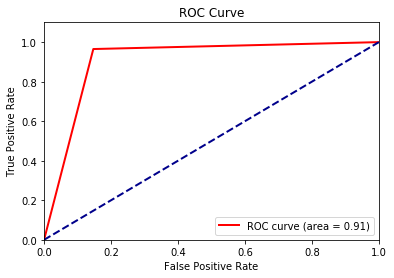

In [39]:
# Accuracy, Precision, Recall, F-score, and AUC of TRAIN SET

cm = metrics.confusion_matrix(y_train,final_pred_y)
print("\nConfusion Matrix for train data:\n",cm)
fpr, tpr, _ = roc_curve(y_train,final_pred_y)
area_uc = auc(fpr, tpr)
print("\nArea under curve for train data:",area_uc)
plt.figure()
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve (area = %0.2f)' % area_uc)
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend(loc="lower right")
plt.show()

### Confusion Matrix and ROC for Test Set


Confusion Matrix for test data:
 [[ 8 34]
 [70  1]]

Area under curve for test data: 0.102280348759222


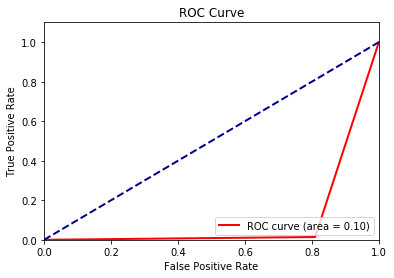

In [52]:

cm = metrics.confusion_matrix(unsupervised_test_results["True_y"],unsupervised_test_results["Pred_y"])
print("\nConfusion Matrix for test data:\n",cm)
fpr, tpr, _ = roc_curve(unsupervised_test_results["True_y"],unsupervised_test_results["Pred_y"])
area_uc = auc(fpr, tpr)
print("\nArea under curve for test data:",area_uc)
plt.figure()
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve (area = %0.2f)' % area_uc)
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend(loc="lower right")
plt.show()

### Spectral Clustering: 
#### Using spectral clustering, which is clustering based on kernels.  Using RBF kernel.

In [53]:
from sklearn.cluster import SpectralClustering

In [61]:
final_spectral_train_results = {p:None for p in ['accuracy','precision','recall','fscore','auc']}
final_spectral_test_results = {p:None for p in ['accuracy','precision','recall','fscore','auc']}


spectr_train_results={p:[] for p in ['accuracy','precision','recall','fscore','auc']}

spectr_test_results={p:[] for p in ['accuracy','precision','recall','fscore','auc']}

for i in range(1,31):
    
    # Randomly selecting Labelled Data (with 50% positive and 50% negative samples) in train set
    
    X_test = pd.concat([X_positive.sample(frac=0.2),X_negative.sample(frac=0.2)])
    X_train=normalized_data.drop(index=X_test.index.tolist())

    y_test=X_test["Diagnosis"]
    y_train=X_train["Diagnosis"]

    X_test = X_test.drop(["Diagnosis"],axis=1)
    X_train = X_train.drop(["Diagnosis"],axis=1)

    X_label, X_unlabel, y_label, y_unlabel = train_test_split(X_train, y_train, test_size=0.50, stratify=y_train)

    X_train=X_train.reset_index(drop=True)
    y_train=y_train.reset_index(drop=True)
    X_test=X_test.reset_index(drop=True)
    y_test=y_test.reset_index(drop=True)
    
    # Computing the centers of two clusters 
    sp_clus=SpectralClustering(n_clusters=2,affinity='rbf',n_init=20,random_state=random.randint(20,200)).fit(X_train)
    sp_clus_labels=pd.DataFrame(sp_clus.labels_)
 
    sp_clus_label_0=sp_clus_labels[sp_clus_labels[0]==0].index
    sp_clus_label_1=sp_clus_labels[sp_clus_labels[0]==1].index
    
    sp_clus_0=X_train.iloc[sp_clus_label_0,:]
    sp_clus_1=X_train.iloc[sp_clus_label_1,:]
    
    center_0=sp_clus_0.mean(axis=0)
    center_1=sp_clus_1.mean(axis=0)
    
    centers=pd.DataFrame()
    centers[0]=center_0
    centers[1]=center_1
    #print(centers.T)

    # Finding the closest 30 data points to each center
    nn = NearestNeighbors(n_neighbors=30,algorithm='brute').fit(X_train)
    distances, indices = nn.kneighbors(centers.T)
    

    # Reading the true lables of the 30 datapoints
    sp_clus_0=y_train.loc[indices[0]]
    sp_clus_1=y_train.loc[indices[1]]


    # Taking a majority poll with these 30 points
    maj_poll_clus_0=sp_clus_0.value_counts()
    maj_poll_clus_1=sp_clus_1.value_counts()

    # Finding the labels provided by K_means
    pred_labels_spec= k_means.labels_
    pred_labels_spec= pd.DataFrame(pred_labels_spec)

    pred_labels_spec_0=pred_labels_spec[pred_labels_spec[0]==0]
    pred_labels_spec_1=pred_labels_spec[pred_labels_spec[0]==1]

    # Compare the labels provided by K-means with the true labels of the training data

    max_index_spec_0=np.argmax(maj_poll_clus_0)
    max_index_spec_1=np.argmax(maj_poll_clus_1)
    pred_labels_spec_0['class']=max_index_spec_0
    pred_labels_spec_1['class']=max_index_spec_1
    final_pred_spec_y=pd.concat([pred_labels_spec_0['class'],pred_labels_spec_1['class']],axis=0)
    final_pred_spec_y=final_pred_spec_y.sort_index()

    # Testing the final Model on Test data
    
    spectral_test_results = pd.DataFrame()
    spectral_test_results["True_y"] = y_test
    spectral_test_results["Pred_y"] = sp_clus.fit_predict(X_test)


    # Accuracy, Precision, Recall, F-score, and AUC of TRAIN SET and TEST SET

    # Accuracy for Train and Test
    spectr_train_results['accuracy'].append(accuracy_score(y_train,final_pred_spec_y))
    spectr_test_results['accuracy'].append(accuracy_score(spectral_test_results["True_y"],spectral_test_results["Pred_y"]))

    # Precision for Train and Test
    spectr_train_results['precision'].append(precision_score(y_train,final_pred_spec_y))
    spectr_test_results['precision'].append(precision_score(spectral_test_results["True_y"],spectral_test_results["Pred_y"]))

    # Recall for Train and Test
    spectr_train_results['recall'].append(recall_score(y_train,final_pred_spec_y))
    spectr_test_results['recall'].append(recall_score(spectral_test_results["True_y"],spectral_test_results["Pred_y"]))

    # F-score for Train and Test
    spectr_train_results['fscore'].append(f1_score(y_train,final_pred_spec_y))
    spectr_test_results['fscore'].append(f1_score(spectral_test_results["True_y"],spectral_test_results["Pred_y"]))

    # AUC for Train and Test
    fpr, tpr, _ = roc_curve(y_train,final_pred_spec_y)
    area_uc = auc(fpr, tpr)
    spectr_train_results['auc'].append(auc(fpr, tpr))

    fpr, tpr, _ = roc_curve(spectral_test_results["True_y"],spectral_test_results["Pred_y"])
    area_uc = auc(fpr, tpr)
    spectr_test_results['auc'].append(auc(fpr, tpr))

    # Average scores (accuracy, precision, recall, F-score, and AUC) for Train set
    final_spectral_train_results['accuracy']=np.mean(spectr_train_results['accuracy'])
    final_spectral_train_results['precision']=np.mean(spectr_train_results['precision'])
    final_spectral_train_results['recall']=np.mean(spectr_train_results['recall'])
    final_spectral_train_results['fscore']=np.mean(spectr_train_results['fscore'])
    final_spectral_train_results['auc']=np.mean(spectr_train_results['auc'])
    
     # Average scores (accuracy, precision, recall, F-score, and AUC) for Test set
    final_spectral_test_results['accuracy']=np.mean(spectr_test_results['accuracy'])
    final_spectral_test_results['precision']=np.mean(spectr_test_results['precision'])
    final_spectral_test_results['recall']=np.mean(spectr_test_results['recall'])
    final_spectral_test_results['fscore']=np.mean(spectr_test_results['fscore'])
    final_spectral_test_results['auc']=np.mean(spectr_test_results['auc'])
    
print("\n Average Score over 30 Runs for Train set:\n")
print(final_spectral_train_results)

print("\n Average Score over 30 Runs for Test set:\n")
print(final_spectral_test_results)


 Average Score over 30 Runs for Train set:

{'accuracy': 0.6011695906432748, 'precision': 0.6705431911120762, 'recall': 0.6703962703962704, 'fscore': 0.6637905733214079, 'auc': 0.5775510763746058}

 Average Score over 30 Runs for Test set:

{'accuracy': 0.4197640117994101, 'precision': 0.3296725978368791, 'recall': 0.40046948356807505, 'fscore': 0.35936264765158915, 'auc': 0.4264252179745139}


### Confusion Matrix and ROC for Train Set


Confusion Matrix for train data:
 [[ 76  94]
 [ 75 211]]

Area under curve for train data: 0.5924105306458248


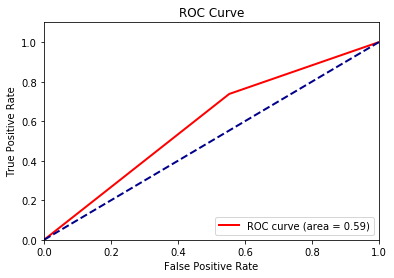

In [62]:

cm = metrics.confusion_matrix(y_train,final_pred_spec_y)
print("\nConfusion Matrix for train data:\n",cm)
fpr, tpr, _ = roc_curve(y_train,final_pred_spec_y)
area_uc = auc(fpr, tpr)
print("\nArea under curve for train data:",area_uc)
plt.figure()
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve (area = %0.2f)' % area_uc)
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend(loc="lower right")
plt.show()

### Confusion Matrix and ROC for Test Set


Confusion Matrix for test data:
 [[30 12]
 [71  0]]

Area under curve for test data: 0.35714285714285715


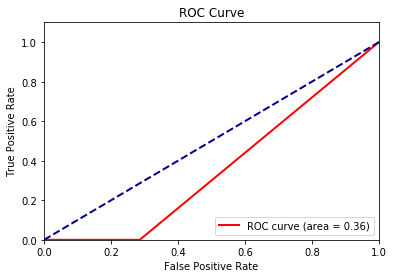

In [58]:

cm = metrics.confusion_matrix(spectral_test_results["True_y"],spectral_test_results["Pred_y"])
print("\nConfusion Matrix for test data:\n",cm)
fpr, tpr, _ = roc_curve(spectral_test_results["True_y"],spectral_test_results["Pred_y"])
area_uc = auc(fpr, tpr)
print("\nArea under curve for test data:",area_uc)
plt.figure()
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve (area = %0.2f)' % area_uc)
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend(loc="lower right")
plt.show()

In [81]:
print("\n Results for Test Data : ")
pd.DataFrame({'Supervised':final_supervised_test_results,'Semi-Supervised':final_semi_supervised_test_results,'Unsupervised-K-means':final_unsupervised_test_results,'Unsupervised- Spectral':final_spectral_test_results})


 Results for Test Data : 


,Supervised,Semi-Supervised,Unsupervised-K-means,Unsupervised- Spectral
accuracy,0.965192,0.946903,0.362832,0.419764
auc,0.960468,0.928571,0.369612,0.426425
fscore,0.972562,0.959459,0.336793,0.359363
precision,0.966749,0.922078,0.335964,0.329673
recall,0.978873,1.000000,0.343192,0.400469


### Inference :
#### We can see that Supervised learning has performed slightly better than semi-supervised learning. 
#### UnSupervised learning has underperformed and gives worse accuracy than Supervised and Semi-Supervised.
#### Spectral Clustering with rbf kernel performs slightly better than K-means Algorithm, Spectral clustering is a more stable algorithm due to its transformation of feature space but it is a slower algorithm than K-means.